In [1]:
%config InlineBackend.figure_formats = ['svg']
import quimb.tensor as qtn
import quimb as qu
import cotengra as ctg
import autoray as ar
# from time_compressed_algo import register_ as reg
from time_compressed_algo import algo_cooling as algo
from time_compressed_algo import quf
import time
import numpy as np
from quimb.tensor.belief_propagation.l2bp import L2BP

In [2]:
# chi = 8
# loss_history_8_ = qu.load_from_disk(f"store/params_chi{chi}_L{36}")
# loss_history_8_ = { u: float(v)   for u, v in loss_history_8_.items()}
# loss_history_8_

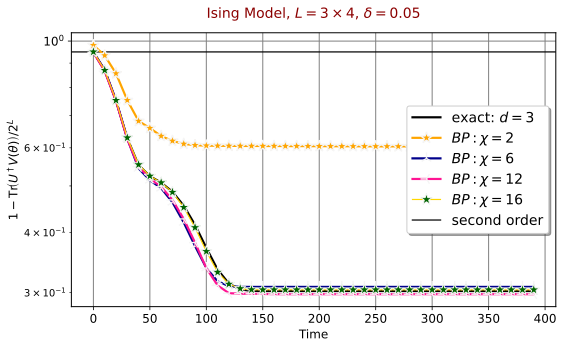

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))  # compact and clean figure



loss_history_3 = qu.load_from_disk(f"store/loss_L12_d{3}")
loss_history_4 = qu.load_from_disk(f"store/loss_L12_d{4}")

chi, d= 2, 3
loss_history_su_3_2 = qu.load_from_disk(f"store/loss_su_chi{chi}_L12_d{d}")
chi, d= 6, 3
loss_history_su_3_6 = qu.load_from_disk(f"store/loss_su_chi{chi}_L12_d{d}")
chi, d= 12, 3
loss_history_su_3_12 = qu.load_from_disk(f"store/loss_su_chi{chi}_L12_d{d}")
chi, d= 16, 3
loss_history_su_3_16 = qu.load_from_disk(f"store/loss_su_chi{chi}_L12_d{d}")



x = [ i for i in range(400)]
step = 10
plt.plot(
    x[::step], loss_history_3[::step], zorder=5, label=r"exact: $d=3$",color="black",
    markersize=12, linewidth=2.2, alpha=1., marker='', linestyle='-',
    markeredgecolor="whitesmoke", mfc="black", markeredgewidth=1.4
)

step = 10
plt.plot(
    x[::step], loss_history_su_3_2[::step], zorder=5, label=r"$BP: \chi=2$",color="orange",
    markersize=12, linewidth=2.2, alpha=1., marker='*', linestyle='-',
    markeredgecolor="whitesmoke", mfc="orange", markeredgewidth=1.4
)

step = 10
plt.plot(
    x[::step], loss_history_su_3_6[::step], zorder=5, label=r"$BP: \chi=6$",color="darkblue",
    markersize=12, linewidth=2.2, alpha=1., marker='2', linestyle='-',
    markeredgecolor="whitesmoke", mfc="darkblue", markeredgewidth=1.4
)

step = 10

plt.plot(
    x[::step], loss_history_su_3_12[::step], zorder=5, label=r"$BP: \chi=12$",color="deeppink",
    markersize=12, linewidth=2.2, alpha=1., marker='3', linestyle='-',
    markeredgecolor="whitesmoke", mfc="tomato", markeredgewidth=1.4
)


step = 10

plt.plot(
    x[::step], loss_history_su_3_16[::step], zorder=5, label=r"$BP: \chi=16$",color="gold",
    markersize=12, linewidth=1.2, alpha=1., marker='*', linestyle='-',
    markeredgecolor="whitesmoke", mfc="darkgreen", markeredgewidth=1.
)



plt.yscale('log')

plt.axhline(y=0.9496653, color='black', linestyle='-', linewidth=1.5, alpha=0.8, label=r"second order")

# Set axis limits
# plt.xlim(0, max(t_l))        # adjust x-axis range if needed
# plt.ylim(0.99, 0.99999)            # adjust y-axis range for log scale

plt.ylabel(r"$ 1- \mathrm{Tr}\!\left(U^\dagger V(\theta)\right) / 2^L$", fontsize=12)
plt.xlabel("Time", fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.3, alpha=0.5)
plt.tick_params(width=0.8, labelsize=12)
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.)


plt.title(rf"Ising Model, $L = {3} \times {4}$, $\delta={0.05}$", fontsize=14, color='darkred', pad=15)  # pad adds space above the plot

plt.grid(color='gray', linestyle='-', linewidth=1., alpha=1.)
plt.legend(loc='best', frameon=True, shadow=True, fontsize=14)
plt.tight_layout()
plt.show()


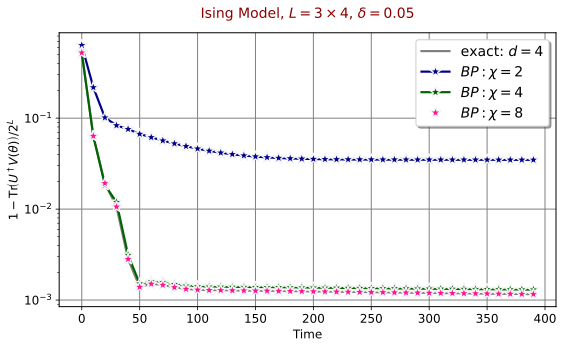

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))  # compact and clean figure



loss_history_4 = qu.load_from_disk(f"store/loss_L12_d{4}")

chi, d= 2, 4
loss_history_su_4_2 = qu.load_from_disk(f"store/loss_su_chi{chi}_L12_d{d}")

chi, d= 4, 4
loss_history_su_4_4 = qu.load_from_disk(f"store/loss_su_chi{chi}_L12_d{d}")


chi, d= 8, 4
loss_history_su_4_8 = qu.load_from_disk(f"store/loss_su_chi{chi}_L12_d{d}")

chi, d= 16, 4
loss_history_su_4_16 = qu.load_from_disk(f"store/loss_su_chi{chi}_L12_d{d}")



x = [ i for i in range(400)]
step = 10
plt.plot(
    x[::step], loss_history_4[::step], zorder=5, label=r"exact: $d=4$",color="gray",
    markersize=12, linewidth=2.2, alpha=1., marker='', linestyle='-',
    markeredgecolor="whitesmoke", mfc="gray", markeredgewidth=1.4
)


step = 10
plt.plot(
    x[::step], loss_history_su_4_2[::step], zorder=5, label=r"$BP: \chi=2$",color="darkblue",
    markersize=12, linewidth=2.2, alpha=1., marker='*', linestyle='-',
    markeredgecolor="whitesmoke", mfc="darkblue", markeredgewidth=1.4
)

step = 10
plt.plot(
    x[::step], loss_history_su_4_4[::step], zorder=5, label=r"$BP: \chi=4$",color="darkgreen",
    markersize=12, linewidth=2.2, alpha=1., marker='*', linestyle='-',
    markeredgecolor="whitesmoke", mfc="darkgreen", markeredgewidth=1.4
)

step = 10
plt.plot(
    x[::step], loss_history_su_4_8[::step], zorder=5, label=r"$BP: \chi=8$",color="deeppink",
    markersize=12, linewidth=2.2, alpha=1., marker='*', linestyle='',
    markeredgecolor="whitesmoke", mfc="deeppink", markeredgewidth=1.4
)

# step = 10

# plt.plot(
#     x[::step], loss_history_su_4_16[::step], zorder=5, label=r"$BP: \chi=16$",color="deeppink",
#     markersize=12, linewidth=2.2, alpha=1., marker='3', linestyle='-',
#     markeredgecolor="whitesmoke", mfc="tomato", markeredgewidth=1.4
# )





plt.yscale('log')

# plt.axhline(y=0.9496653, color='black', linestyle='-', linewidth=1.5, alpha=0.8, label=r"second order")

# Set axis limits
# plt.xlim(0, max(t_l))        # adjust x-axis range if needed
# plt.ylim(0.99, 0.99999)            # adjust y-axis range for log scale

plt.ylabel(r"$ 1- \mathrm{Tr}\!\left(U^\dagger V(\theta)\right) / 2^L$", fontsize=12)
plt.xlabel("Time", fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.3, alpha=0.5)
plt.tick_params(width=0.8, labelsize=12)
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.)


plt.title(rf"Ising Model, $L = {3} \times {4}$, $\delta={0.05}$", fontsize=14, color='darkred', pad=15)  # pad adds space above the plot

plt.grid(color='gray', linestyle='-', linewidth=1., alpha=1.)
plt.legend(loc='best', frameon=True, shadow=True, fontsize=14)
plt.tight_layout()
plt.show()


In [5]:
# loss_history_su_4_8[:2], loss_history_su_4_16[:2]

In [6]:
loss_history_4 = qu.load_from_disk(f"store/loss_L12_d{4}")


<Figure size 800x500 with 0 Axes>

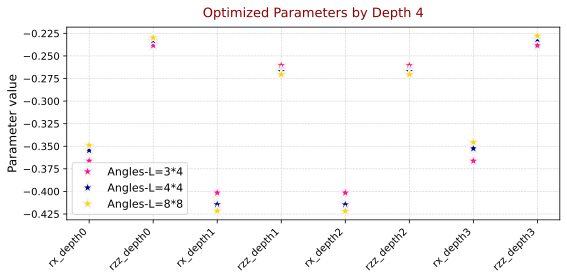

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))  # compact and clean figure



params = qu.load_from_disk(f"store/params_L12_d{4}")
params_ = qu.load_from_disk(f"store/params_su_chi{8}_L16_d{4}")
params_1 = qu.load_from_disk(f"store/params_su_chi{8}_L{64}_d{4}")


# convert to lists for plotting
names = list(params.keys())
values = [v.detach().cpu().item() for v in params.values()]

names = list(params.keys())
values_ = [v.detach().cpu().item() for v in params_.values()]

names = list(params.keys())
values_1 = [v.detach().cpu().item() for v in params_1.values()]


# plot
plt.figure(figsize=(8, 4))
plt.plot(
    names, values, zorder=5, label=r"Angles-L=3*4",color="deeppink",
    markersize=12, linewidth=2.2, alpha=1., marker='*', linestyle='',
    markeredgecolor="whitesmoke", mfc="deeppink", markeredgewidth=1.4
)
plt.plot(
    names, values_, zorder=5, label=r"Angles-L=4*4",color="darkblue",
    markersize=12, linewidth=2.2, alpha=1., marker='*', linestyle='',
    markeredgecolor="whitesmoke", mfc="darkblue", markeredgewidth=1.4
)


plt.plot(
    names, values_1, zorder=5, label=r"Angles-L=8*8",color="gold",
    markersize=12, linewidth=2.2, alpha=1., marker='*', linestyle='',
    markeredgecolor="whitesmoke", mfc="gold", markeredgewidth=1.4
)


plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Parameter value', fontsize=12)
plt.title('Optimized Parameters by Depth 4', fontsize=13, pad=10, color='darkred')
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()



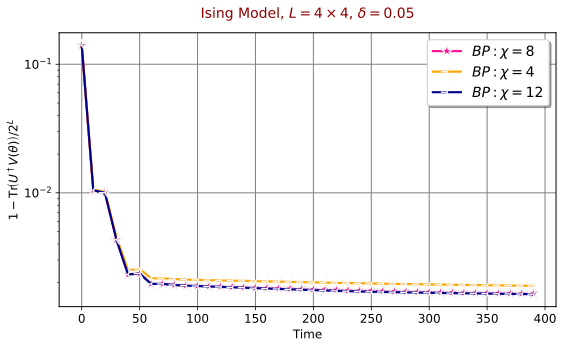

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))  # compact and clean figure




chi, d= 12, 4
loss_history_su_4_12 = qu.load_from_disk(f"store/loss_su_chi{chi}_L16_d{d}")


chi, d= 8, 4
loss_history_su_4_8 = qu.load_from_disk(f"store/loss_su_chi{chi}_L16_d{d}")

chi, d= 4, 4
loss_history_su_4_4 = qu.load_from_disk(f"store/loss_su_chi{chi}_L16_d{d}")




x = [ i for i in range(400)]

step = 10
plt.plot(
    x[::step], loss_history_su_4_8[::step], zorder=5, label=r"$BP: \chi=8$",color="deeppink",
    markersize=12, linewidth=2.2, alpha=1., marker='*', linestyle='-',
    markeredgecolor="whitesmoke", mfc="deeppink", markeredgewidth=1.4
)

step = 10

plt.plot(
    x[::step], loss_history_su_4_4[::step], zorder=5, label=r"$BP: \chi=4$",color="orange",
    markersize=12, linewidth=2.2, alpha=1., marker='3', linestyle='-',
    markeredgecolor="whitesmoke", mfc="orange", markeredgewidth=1.4
)

step = 10

plt.plot(
    x[::step], loss_history_su_4_12[::step], zorder=5, label=r"$BP: \chi=12$",color="darkblue",
    markersize=12, linewidth=2.2, alpha=1., marker='3', linestyle='-',
    markeredgecolor="whitesmoke", mfc="darkblue", markeredgewidth=1.4
)




plt.yscale('log')

# plt.axhline(y=0.9496653, color='black', linestyle='-', linewidth=1.5, alpha=0.8, label=r"second order")

# Set axis limits
# plt.xlim(0, max(t_l))        # adjust x-axis range if needed
# plt.ylim(0.99, 0.99999)            # adjust y-axis range for log scale

plt.ylabel(r"$ 1- \mathrm{Tr}\!\left(U^\dagger V(\theta)\right) / 2^L$", fontsize=12)
plt.xlabel("Time", fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.3, alpha=0.5)
plt.tick_params(width=0.8, labelsize=12)
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.)


plt.title(rf"Ising Model, $L = {4} \times {4}$, $\delta={0.05}$", fontsize=14, color='darkred', pad=15)  # pad adds space above the plot

plt.grid(color='gray', linestyle='-', linewidth=1., alpha=1.)
plt.legend(loc='best', frameon=True, shadow=True, fontsize=14)
plt.tight_layout()
plt.show()
